In [185]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [186]:
my_data_dir = 'C:\\Users\Thaswika\\Desktop\\UdemyCourse\\AIImageRecognitionImplementation\\IMAGEDATA\\DATASET'

In [187]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir) 

['Test', 'Train']

In [188]:
test_path = my_data_dir+'\\Test\\'
train_path = my_data_dir+'\\Train\\'

In [189]:
os.listdir(test_path)

['DAMAGE', 'WHOLE']

In [190]:
os.listdir(train_path)

['DAMAGE', 'WHOLE']

In [191]:
#os.listdir(train_path+'\\DAMAGE')

In [192]:
os.listdir(train_path+'\\DAMAGE')[0]

'0001.JPEG'

In [193]:
#os.listdir(test_path+'\\WHOLE')

In [194]:
os.listdir(test_path+'\\WHOLE')[0]

'0001.jpg'

In [195]:
Damaged_Car = train_path+'\\DAMAGE'+'\\0255.JPEG'

In [196]:
Whole_Car = test_path+'\\WHOLE'+'\\0001.JPG'

In [197]:
Whole_Image= imread(Whole_Car)

In [198]:
Damaged_Image= imread(Damaged_Car)

In [199]:
#Whole_Image= imread(Whole_Car)

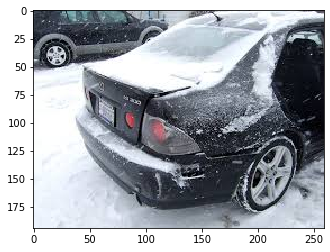

In [200]:
plt.imshow(Damaged_Image)

In [201]:
Damaged_Image.shape

(194, 259, 3)

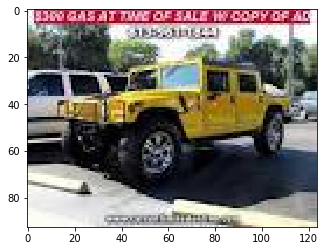

In [202]:
WholeCar_path = train_path+'\\WHOLE\\'+os.listdir(train_path+'\\WHOLE')[0]
Whole_Car = imread(WholeCar_path)
plt.imshow(Whole_Car)

**Let's check how many images there are.**

In [203]:
len(os.listdir(train_path+'\\DAMAGE'))

920

In [204]:
len(os.listdir(train_path+'\\WHOLE'))

920

**Let's find out the average dimensions of these images.**

In [205]:
Whole_Car.shape

(93, 124, 3)

In [206]:
Damaged_Image.shape

(194, 259, 3)

In [207]:
# Other options: https://stackoverflow.com/questions/1507084/how-to-check-dimensions-of-all-images-in-a-directory-using-python
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\WHOLE'):
    
    img = imread(test_path+'\\WHOLE'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

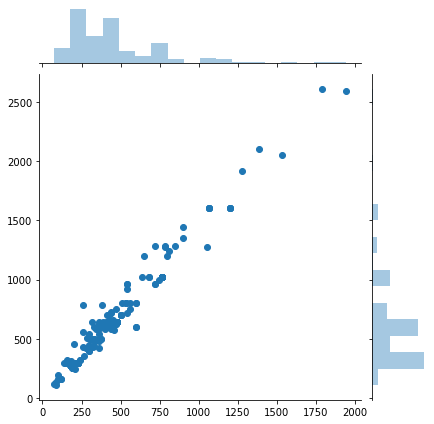

In [208]:
sns.jointplot(dim1,dim2)

In [209]:
np.mean(dim1)

441.8478260869565

In [210]:
np.mean(dim2)

638.9043478260869

In [211]:
image_shape = (442,639,3)

## Preparing the Data for the model

There is too much data for us to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

### Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us. Check out the documentation for a full list of all the parameters you can use here!

In [212]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [213]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0.
 |      featurewise_std_normalization: Boolean.
 |          Divide inputs by std of the dataset, feature-wise.
 |      samplewise_std_normalization: Boolean. Divide each input by its std.
 |      zca_epsilon: epsilon for ZCA whitening. Default is 1e-6.
 |      zca_whitening: Boolean. Apply ZCA whitening.
 |      rotation_range: Int. Degree range for random rotations.
 |      width_shift_range: Float, 1-D array-like or int
 |          - float: fraction of total width, if < 1, or pixels if >= 1.
 |     

In [214]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

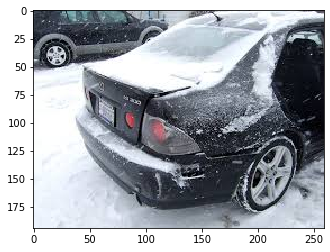

In [215]:
plt.imshow(Damaged_Image)

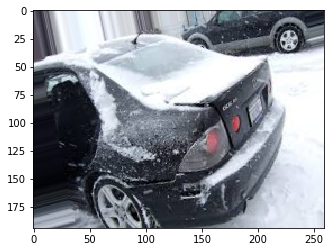

In [216]:
plt.imshow(image_gen.random_transform(Damaged_Image))

In [217]:
#plt.imshow(image_gen.random_transform(para_img))

### Generating many manipulated images from a directory


In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [218]:
image_gen.flow_from_directory(train_path)

Found 1840 images belonging to 2 classes.


In [219]:
image_gen.flow_from_directory(test_path)

Found 461 images belonging to 2 classes.


# Creating the Model

In [220]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [221]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, f its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [222]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 440, 637, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 220, 318, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 218, 316, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 109, 158, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 107, 156, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 53, 78, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 264576)           

## Early Stopping

In [223]:
from tensorflow.keras.callbacks import EarlyStopping

In [224]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Training the Model

In [225]:
help(image_gen.flow_from_directory)

Help on method flow_from_directory in module keras_preprocessing.image.image_data_generator:

flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest') method of tensorflow.python.keras.preprocessing.image.ImageDataGenerator instance
    Takes the path to a directory & generates batches of augmented data.
    
    # Arguments
        directory: string, path to the target directory.
            It should contain one subdirectory per class.
            Any PNG, JPG, BMP, PPM or TIF images
            inside each of the subdirectories directory tree
            will be included in the generator.
            See [this script](
            https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)
            for more details.
        target_size: Tuple of integers `(height, width

In [226]:
batch_size = 16

In [227]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 1840 images belonging to 2 classes.


In [228]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 461 images belonging to 2 classes.


In [229]:
train_image_gen.class_indices

{'DAMAGE': 0, 'WHOLE': 1}

In [230]:
import warnings
warnings.filterwarnings('ignore')

In [231]:
#results = model.fit_generator(train_image_gen,epochs=20,
                              #validation_data=test_image_gen,
                             #callbacks=[early_stop])

In [232]:
from tensorflow.keras.models import load_model
model.save('FindingDamagedCar.h5')

# Evaluating the Model

In [233]:
#losses = pd.DataFrame(model.history.history)

In [234]:
#losses[['loss','val_loss']].plot()

In [235]:
model.metrics_names

['loss', 'accuracy']

In [236]:
model.evaluate_generator(test_image_gen)

[0.6948895146106852, 0.5010846]

In [237]:
from tensorflow.keras.preprocessing import image

In [238]:
# https://datascience.stackexchange.com/questions/13894/how-to-get-predictions-with-predict-generator-on-streaming-test-data-in-keras
pred_probabilities = model.predict_generator(test_image_gen)

In [239]:
pred_probabilities

array([[0.4730978 ],
       [0.475662  ],
       [0.48536563],
       [0.4815966 ],
       [0.4860252 ],
       [0.46903825],
       [0.47811228],
       [0.48022667],
       [0.4766552 ],
       [0.4673459 ],
       [0.46858275],
       [0.4749694 ],
       [0.4668103 ],
       [0.4806433 ],
       [0.49173355],
       [0.47388726],
       [0.46680227],
       [0.49157956],
       [0.48205072],
       [0.47535816],
       [0.47421828],
       [0.47200042],
       [0.4633635 ],
       [0.4750454 ],
       [0.4864686 ],
       [0.4664241 ],
       [0.47587296],
       [0.47758284],
       [0.46704635],
       [0.46825188],
       [0.46523738],
       [0.47905776],
       [0.4607366 ],
       [0.472331  ],
       [0.47105485],
       [0.46032542],
       [0.48849615],
       [0.47270513],
       [0.48110223],
       [0.47755045],
       [0.4703324 ],
       [0.47587255],
       [0.47793916],
       [0.47761992],
       [0.48712224],
       [0.4758682 ],
       [0.4682928 ],
       [0.483

In [240]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [241]:
predictions = pred_probabilities > 0.5

In [242]:
# Numpy can treat this as True/False for us
predictions

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [243]:
from sklearn.metrics import classification_report,confusion_matrix

In [244]:
predictions


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [245]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       231
           1       0.00      0.00      0.00       230

    accuracy                           0.50       461
   macro avg       0.25      0.50      0.33       461
weighted avg       0.25      0.50      0.33       461



In [246]:
confusion_matrix(test_image_gen.classes,predictions)

array([[231,   0],
       [230,   0]], dtype=int64)

# Predicting on an Image

In [247]:
# Your file path will be different!
Damaged_Car

'C:\\Users\\Thaswika\\Desktop\\UdemyCourse\\AIImageRecognitionImplementation\\IMAGEDATA\\DATASET\\Train\\\\DAMAGE\\0255.JPEG'

In [318]:

Test_DCar = test_path+'\\DAMAGE'+'\\0049.jpeg'

In [319]:
Test_DCar

'C:\\Users\\Thaswika\\Desktop\\UdemyCourse\\AIImageRecognitionImplementation\\IMAGEDATA\\DATASET\\Test\\\\DAMAGE\\0049.jpeg'

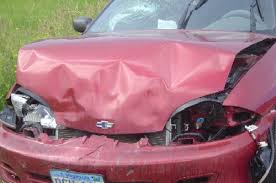

In [320]:
image.load_img(Test_DCar)

In [381]:
Test_WCar = train_path+'\\WHOLE'+'\\0032.jpg'

In [382]:
Test_WCar

'C:\\Users\\Thaswika\\Desktop\\UdemyCourse\\AIImageRecognitionImplementation\\IMAGEDATA\\DATASET\\Train\\\\WHOLE\\0032.jpg'

In [383]:
from tensorflow.keras.preprocessing import image 

In [254]:
#import os
#from PIL import Image


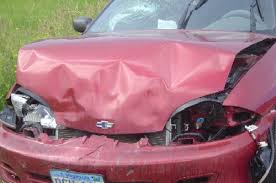

In [384]:
 image.load_img(Test_DCar)

In [256]:
#test_img

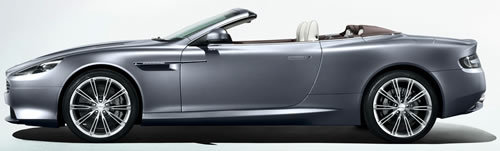

In [409]:
image.load_img(Test_WCar)

In [410]:
my_image = image.load_img(Test_WCar,target_size=image_shape)

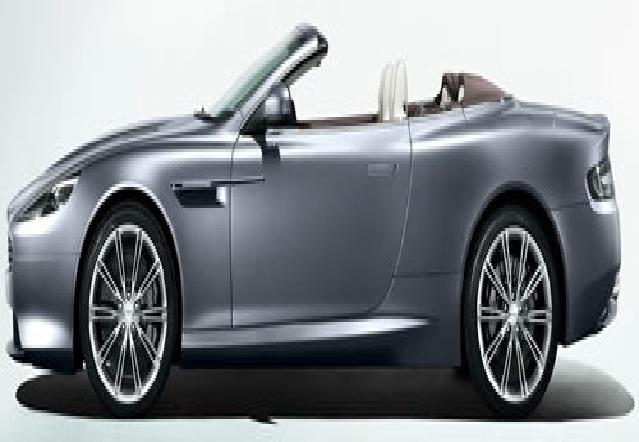

In [412]:
my_image

In [413]:
type(my_image)

PIL.Image.Image

In [414]:
my_image = image.img_to_array(my_image)

In [415]:
type(my_image)

numpy.ndarray

In [416]:
my_image.shape

(442, 639, 3)

In [417]:
my_image = np.expand_dims(my_image, axis=0)

In [418]:
my_image.shape

(1, 442, 639, 3)

In [419]:
model.predict(my_image)

array([[0.]], dtype=float32)

In [331]:
train_image_gen.class_indices

{'DAMAGE': 0, 'WHOLE': 1}

In [268]:
#encoder.classes_

In [269]:
test_image_gen.class_indices

{'DAMAGE': 0, 'WHOLE': 1}

# Production Deployment Model

In [270]:
from tensorflow.keras.models import load_model
import numpy as np
import joblib

car_model = load_model("FindingDamagedCar.h5")

def return_prediction(model,IMAGE):
   
    
    inputimage= image.load_img(IMAGE,target_size=image_shape)
    inputimage= image.img_to_array(inputimage)
    inputimage = np.expand_dims(inputimage, axis=0)
    classes = np.array(['DAMAGED','WHOLE'])
    class_ind = model.predict_classes(inputimage)
    return classes [class_ind][0]